In [103]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
html_soup = soup(html, 'html.parser')

In [9]:
df_table = pd.read_html(url)

In [14]:
df_table[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


## Alternate scraping method

In [38]:
table = html_soup.find_all('tr', class_='data-row')

In [68]:
table[1].text.replace('\n',' ').strip().split()

['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']

In [87]:
data = list()
for i in range(len(table)):
    data[i:] = [table[i].text.replace('\n',' ').strip().split()]

In [88]:
data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

### End Alternate Scraping Method

In [108]:
df_table[0].dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [109]:
df_table[0].loc[:,'terrestrial_date'] = pd.to_datetime(df_table[0].loc[:,'terrestrial_date'])

In [110]:
df_table[0].dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [112]:
#Q.6, how many months exist on mars
df_table[0].loc[:,'month'].unique()
#12 months exist on mars

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [117]:
#Q.7 how many martian days worth of data exist?
len(df_table[0].loc[:,'sol'].unique())

1867

the coldest month is 3, the warmest month is 8


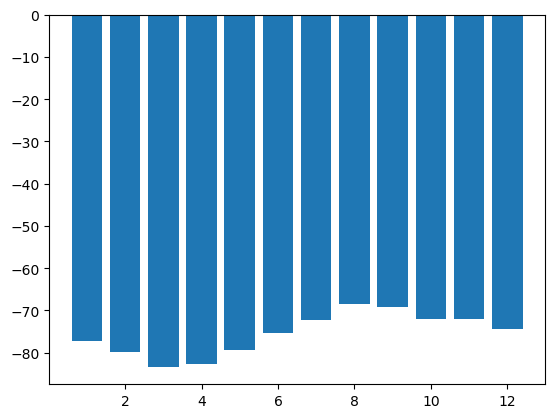

In [137]:
#Q.8, What are the coldest and the warmest months on Mars 
#(at the location of Curiosity)? plot results as bar chart
monthly_lows = df_table[0].groupby(by='month').mean()['min_temp']

plt.bar(monthly_lows.index, monthly_lows)

cold_month = monthly_lows.idxmin()
warm_month = monthly_lows.idxmax()

print(f'the coldest month is {cold_month}, the warmest month is {warm_month}')

8

the lowest pressure month is 6 
the highest pressure month is 9 


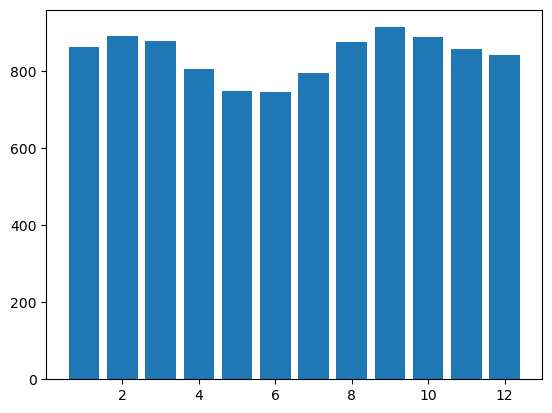

In [138]:
#Q.9 Which months have the lowest and the highest atmospheric pressure on Mars?
#plot result as a bar chart

monthly_pressure = df_table[0].groupby(by='month').mean()['pressure']

plt.bar(monthly_pressure.index, monthly_pressure)

lp_month = monthly_pressure.idxmin()
hp_month = monthly_pressure.idxmax()

print(f'the lowest pressure month is {lp_month} ')
print(f'the highest pressure month is {hp_month} ')

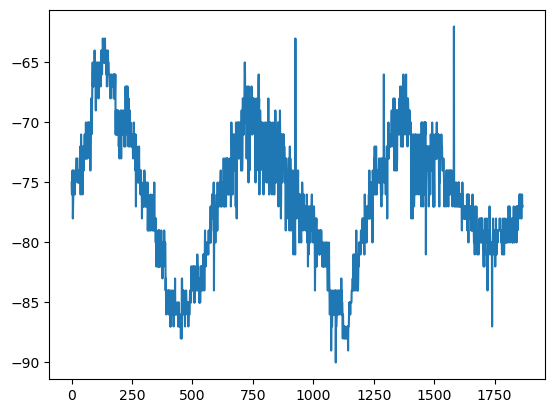

In [142]:
#Q.10 About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth?

plt.plot(df_table[0]['min_temp'])
#estimated 600 days visually

In [151]:
# more precise calculation of earth days in a maritan year
start_m = df_table[0].loc[0,'ls']
start_e = df_table[0].loc[0,'terrestrial_date']
rotation = df_table[0][df_table[0]['ls']==start_m].reset_index(drop=True)
end_e = rotation.loc[1,'terrestrial_date']

end_e - start_e

Timedelta('686 days 00:00:00')

In [152]:
df_table[0].to_csv('Mars_Temp_Data.csv')